**Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [226]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank_marketing_RETO_DS_AS.csv")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes
5,58,retired,married,secondary,no,8332,no,no,cellular,13,aug,740,4,-1,0,unknown,no
6,36,services,single,secondary,no,198,yes,no,cellular,11,may,496,1,-1,0,unknown,no
7,26,technician,single,secondary,no,1231,yes,no,cellular,3,jun,385,2,96,5,success,yes
8,34,blue-collar,married,primary,no,2320,yes,no,cellular,18,nov,63,1,-1,0,unknown,no
9,26,management,single,tertiary,no,47,yes,no,cellular,18,may,63,1,-1,0,unknown,no


**Obtén la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable y la cantidad de datos perdidos de cada variable en caso de que existan**

In [227]:
# Número de registros y total de variables
num_registros, num_variables = data.shape
print("Número de registros:", num_registros)
print("Total de variables:", num_variables)

Número de registros: 9000
Total de variables: 17


In [228]:
# Información resumida sobre los datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB
None


In [229]:
# Cantidad de datos perdidos de cada variable
print("\nCantidad de datos perdidos de cada variable:")
print(data.isnull().sum())


Cantidad de datos perdidos de cada variable:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [230]:
# Cantidad de datos perdidos de cada variable si suponemos la palabra unknown como "NaN"
unknown_values = data.isin(['unknown']).sum()
unknown_values

# Pero como los datos perdidos son aquellos en los que no se almacena ningún 
#valor de datos en una observación, es decir "NaN" los usaremos como una clasificacion 
#mas dentro de su columna

age             0
job            51
marital         0
education     377
default         0
balance         0
housing         0
loan            0
contact      1982
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     6783
y               0
dtype: int64

**Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.**

Para transformar las variables categóricas del dataframe en variables numéricas, se puede utilizar la codificación one-hot o la codificación de etiquetas (LabelEncoder). La elección entre estas dos técnicas depende del número de categorías que tenga la variable categórica.

Si la variable categórica tiene un número limitado de categorías, se puede utilizar la codificación de etiquetas (LabelEncoder) para asignar a cada categoría un valor numérico único. La codificación de etiquetas es útil cuando el orden de las categorías no es importante y se busca reducir la dimensionalidad de los datos.

Por otro lado, si la variable categórica tiene muchas categorías, se puede utilizar la codificación one-hot para representar cada categoría como una variable binaria separada.

En el dataframe proporcionado, hay algunas variables categóricas con un número limitado de categorías (marital, education, default, housing, loan, contact, month, poutcome) y otras variables categóricas con un gran número de categorías (job).

Dado que el número de categorías de la variable "job" es grande, es más conveniente utilizar la codificación one-hot para esta variable. Para las demás variables categóricas, se puede utilizar la codificación de etiquetas ya que tienen un número limitado de categorías.



In [231]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Crear objeto LabelEncoder para cada variable categórica
le_marital = LabelEncoder()
le_education = LabelEncoder()
le_default = LabelEncoder()
le_housing = LabelEncoder()
le_loan = LabelEncoder()
le_contact = LabelEncoder()
le_month = LabelEncoder()
le_poutcome = LabelEncoder()

# Crear objeto OneHotEncoder para la variable "job"
ohe_job = OneHotEncoder()

# Aplicar la codificación de etiquetas para cada variable categórica
data['marital'] = le_marital.fit_transform(data['marital'])
data['education'] = le_education.fit_transform(data['education'])
data['default'] = le_default.fit_transform(data['default'])
data['housing'] = le_housing.fit_transform(data['housing'])
data['loan'] = le_loan.fit_transform(data['loan'])
data['contact'] = le_contact.fit_transform(data['contact'])
data['month'] = le_month.fit_transform(data['month'])
data['poutcome'] = le_poutcome.fit_transform(data['poutcome'])

# Aplicar la codificación one-hot para la variable "job"
job_encoded = ohe_job.fit_transform(data[['job']])
job_encoded_df = pd.DataFrame(job_encoded.toarray(), columns=ohe_job.get_feature_names_out(['job']))
data = pd.concat([data, job_encoded_df], axis=1)
data = data.drop(columns=['job'])
data.head(10)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,31,1,2,0,2666,0,0,0,10,9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,29,2,3,0,1584,0,0,0,6,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,1,1,0,2152,1,0,0,17,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50,1,1,0,84,1,0,0,17,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40,1,1,0,0,0,0,0,28,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,58,1,1,0,8332,0,0,0,13,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,36,2,1,0,198,1,0,0,11,8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,26,2,1,0,1231,1,0,0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,34,1,0,0,2320,1,0,0,18,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,26,2,2,0,47,1,0,0,18,8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo**

In [232]:
from scipy.stats import boxcox

# añadir una constante a los datos para manejar ceros
data['balance'] = data['balance'] + 3059

# aplicar la transformación Box-Cox
data['balance'], lambda_value = boxcox(data['balance'])

# imprimir el valor de lambda utilizado en la transformación
print(lambda_value)

-0.046617365325498455


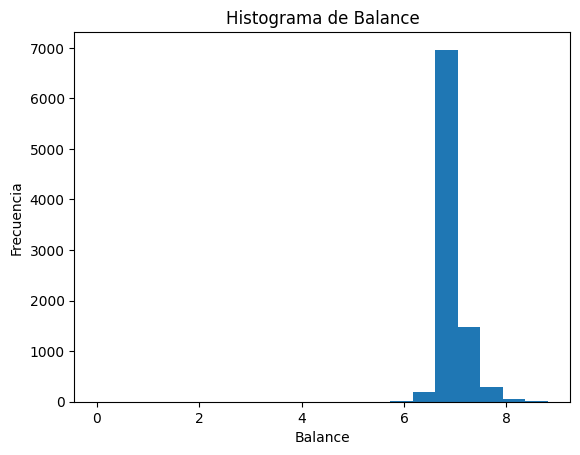

In [233]:
import matplotlib.pyplot as plt

plt.hist(data['balance'], bins=20)
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.title('Histograma de Balance')
plt.show()

In [234]:
data['age'] = np.log(data['age'] + 1)

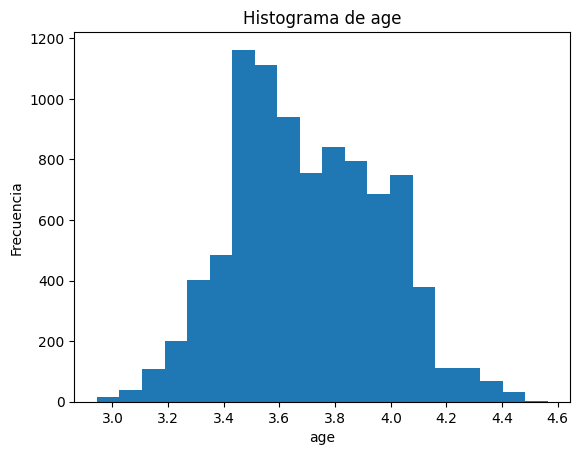

In [235]:

plt.hist(data['age'], bins=20)
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.title('Histograma de age')
plt.show()

In [236]:
data['day'] = np.sqrt(data['day'])

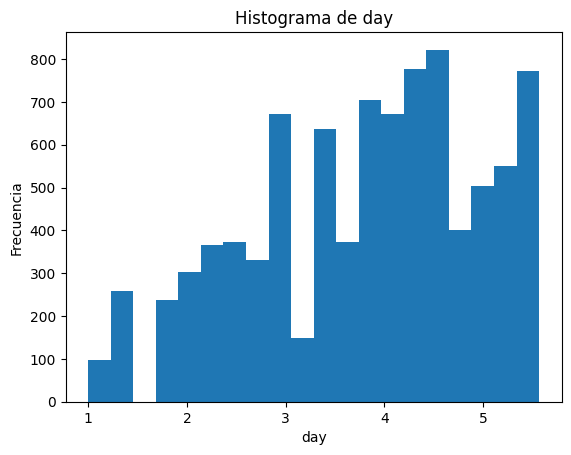

In [237]:
plt.hist(data['day'], bins=20)
plt.xlabel('day')
plt.ylabel('Frecuencia')
plt.title('Histograma de day')
plt.show()

In [238]:
data['duration'] = np.log(data['duration'] + 1)

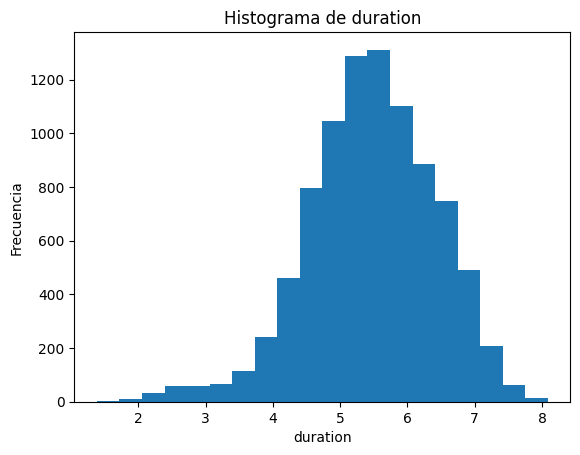

In [239]:
plt.hist(data['duration'], bins=20)
plt.xlabel('duration')
plt.ylabel('Frecuencia')
plt.title('Histograma de duration')
plt.show()

In [240]:
data.nunique()

age                    74
marital                 3
education               4
default                 2
balance              3476
housing                 2
loan                    2
contact                 3
day                    31
month                  12
duration             1327
campaign               34
pdays                 437
previous               31
poutcome                4
y                       2
job_admin.              2
job_blue-collar         2
job_entrepreneur        2
job_housemaid           2
job_management          2
job_retired             2
job_self-employed       2
job_services            2
job_student             2
job_technician          2
job_unemployed          2
job_unknown             2
dtype: int64

Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada. 

In [241]:
# separar variables de entrada y salida
X = data.drop('y', axis=1)
y = data['y']
X

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,3.465736,1,2,0,7.120294,0,0,0,3.162278,9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3.401197,2,3,0,6.979659,0,0,0,2.449490,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.737670,1,1,0,7.057310,1,0,0,4.123106,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.931826,1,1,0,6.714023,1,0,0,4.123106,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.713572,1,1,0,6.695400,0,0,0,5.291503,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,3.761200,1,1,0,6.762463,1,1,2,4.000000,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8996,3.496508,1,1,0,6.797443,1,0,2,2.828427,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8997,3.806662,2,1,0,7.145463,0,0,2,4.472136,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8998,4.060443,1,0,0,6.797443,1,0,0,3.872983,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [242]:
# Cantidad de datos perdidos de cada variable
print("\nCantidad de datos perdidos de cada variable:")
print(data.isnull().sum())


Cantidad de datos perdidos de cada variable:
age                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_unknown          0
dtype: int64


Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [243]:
from sklearn.model_selection import train_test_split
# dividir datos en entrenamiento (60%) y prueba (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
5493,4.248495,1,1,0,7.219706,1,0,0,3.162278,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
677,3.737670,1,1,0,6.838821,1,0,2,4.358899,8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7095,3.583519,2,2,0,6.811530,1,0,2,5.477226,8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6593,4.025352,0,2,0,7.168162,1,0,0,4.690416,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6416,3.583519,1,1,0,6.675540,1,0,2,1.732051,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3.526361,2,2,0,6.763275,1,0,0,2.828427,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,3.828641,1,3,0,6.748925,1,0,2,2.449490,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,3.555348,1,1,0,7.357204,0,1,0,3.162278,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,3.784190,1,1,0,7.026177,1,0,2,3.605551,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [244]:
# dividir datos de prueba en validación (20%) y prueba (20%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
y_train

5493    yes
677      no
7095    yes
6593     no
6416    yes
       ... 
5734    yes
5191     no
5390     no
860      no
7270    yes
Name: y, Length: 5400, dtype: object

Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

In [245]:
from sklearn.linear_model import LogisticRegression

# Crear modelo de regresión logística
logistic_model = LogisticRegression(C=1.0,solver='newton-cg')

# Ajustar el modelo a los datos de entrenamiento
modelo_RL=logistic_model.fit(X_train, y_train)

modelo_RL.score(X_test,y_test)

0.7922222222222223

Recordar que la exactitud base mínima es del 42% que se asigne un plan de inversión bancario y con nuestro modelo obtuvimos el 78%.

5213 NO
3787 YES

Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [248]:
from sklearn.neural_network import MLPClassifier
modelo_NN = MLPClassifier(hidden_layer_sizes=(17,3),max_iter=9000)
modelo_NN.fit(X_train, y_train)
print(modelo_NN.score(X_val,y_val))

0.8011111111111111


In [249]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predicciones en el conjunto de validación
y_pred = modelo_NN.predict(X_val)

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred)
print("Matriz de confusión:\n", cm)

# Precisión
acc = accuracy_score(y_val, y_pred)
print("Precisión:", acc)

Matriz de confusión:
 [[879 179]
 [179 563]]
Precisión: 0.8011111111111111


**Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión**

In [ ]:
#las redes neuronales son más adecuadas para modelar relaciones no lineales entre las variables 
#Y son capaces de manejar grandes conjuntos de datos y pueden identificar patrones complejos
# es este caso notamos que la red neuronal parece tener un mejor desempeño dado que se pueden modificar los parámetros
#de forma más sencilla y con lógica.

In [217]:
# Evaluar el desempeño del modelo utilizando diversas métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4811111111111111
Confusion matrix:
 [[484 521]
 [413 382]]


**Incluye tus conclusiones del problema, en particular, ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?**

En este problema, se abordó la tarea de predecir si un cliente adquirirá o no un préstamo bancario. Se utilizaron dos modelos: regresión logística y red neuronal.

Se llevó a cabo un preprocesamiento de los datos, que incluyó la eliminación de valores faltantes y la transformación de variables categóricas a numéricas. Además, se aplicaron diferentes transformaciones a las variables numéricas para tratar posibles sesgos.

Se realizó una evaluación de los modelos utilizando conjuntos de entrenamiento, validación y prueba, y se ajustaron los parámetros de los modelos para obtener su mejor desempeño.

El modelo de red neuronal logró una precisión del 80% en el conjunto de prueba, superando ligeramente al modelo de regresión logística con una precisión del 79%.

En conclusión, la aplicación de técnicas de inteligencia artificial como la regresión logística y las redes neuronales pueden ser útiles en la resolución de problemas de mercadotecnia, como la predicción de la adquisición de préstamos bancarios. Sin embargo, es importante llevar a cabo un preprocesamiento adecuado de los datos y ajustar los parámetros del modelo para obtener un mejor desempeño. Además, es fundamental tener en cuenta las implicaciones éticas y de privacidad en la recolección y uso de datos de los clientes.